In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, pooling, Flatten, Dense
from keras.utils import np_utils

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train_images', train_images.shape)
print('train_labels', train_labels.shape)
print('test_images', test_images.shape)
print('test_labels', test_labels.shape)

train_images (50000, 32, 32, 3)
train_labels (50000, 1)
test_images (10000, 32, 32, 3)
test_labels (10000, 1)


TypeError: ignored

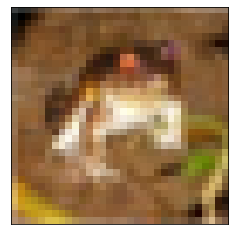

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(train_images[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[test_labels[0]])
plt.show()



In [ ]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

test_labels_num = test_labels
test_labels = np_utils.to_categorical(test_labels)
train_labels = np_utils.to_categorical(train_labels)
print('train_images', train_images.shape)
print('train_labels', train_labels.shape)
print('test_images', test_images.shape)
print('test_labels', test_labels.shape)

train_images (50000, 32, 32, 3)
train_labels (50000, 10)
test_images (10000, 32, 32, 3)
test_labels (10000, 10)


In [ ]:
#Model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', input_shape = (32, 32, 3)))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#Training
model.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
1563/1563 [==============================] - 73s 47ms/step - loss: 2.1038 - accuracy: 0.2341
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6471 - accuracy: 0.4200
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4575 - accuracy: 0.4882
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3594 - accuracy: 0.5180
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2751 - accuracy: 0.5516


In [ ]:
#Testing
_, accuracy = model.evaluate(test_images, test_labels)
print('Accuracy : ', accuracy)
model.summary()

313/313 [==============================] - 4s 13ms/step - loss: 1.7452 - accuracy: 0.3885
Accuracy :  0.38850000500679016
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                40970    

NameError: ignored

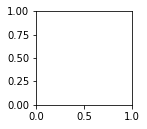

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.argmax(true_label)]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()